## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

## Q1. How many Mammals have at least 20,000 genes? What are their scientific names? (3 pts)
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [ ]:
import pandas as pd
%matplotlib inline
# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# we can specify the delimiter by using the sep keyword argument
euk = pd.read_csv(tsvFile, sep='\t')
euk.tail()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome
8301,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.820700,38.2536,-,-,2018,Chromosome


In [ ]:
euk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   object 
 1   Kingdom             8302 non-null   object 
 2   Class               8302 non-null   object 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 8302 non-null   object 
 5   Number of genes     8302 non-null   object 
 6   Number of proteins  8302 non-null   object 
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 583.9+ KB


In [ ]:
pd.to_numeric(euk["Number of genes"], errors='coerce')

0       38549.0
1       38311.0
2       59847.0
3       37603.0
4       31200.0
         ...   
8297        NaN
8298      155.0
8299        NaN
8300        NaN
8301        NaN
Name: Number of genes, Length: 8302, dtype: float64

In [ ]:
euk[(euk.Class == 'Mammals')]

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
44,Homo sapiens,Animals,Mammals,3257.32000,41.465,60679,119294,2002,Chromosome
45,Mus musculus,Animals,Mammals,2818.97000,41.951,48701,78443,2004,Chromosome
65,Rattus norvegicus,Animals,Mammals,2870.18000,42.3282,39365,56113,2002,Chromosome
70,Felis catus,Animals,Mammals,2521.86000,41.8806,35234,54726,2006,Chromosome
74,Bos taurus,Animals,Mammals,2715.85000,41.9362,34966,63696,2017,Chromosome
...,...,...,...,...,...,...,...,...,...
7783,Homo sapiens,Animals,Mammals,4.89807,44.6,-,-,2017,Scaffold
7784,Homo sapiens,Animals,Mammals,2.09690,45.8,-,-,2017,Scaffold
7789,Homo sapiens,Animals,Mammals,4.78084,44.6,-,-,2017,Scaffold
7790,Homo sapiens,Animals,Mammals,4.79943,44.6,-,-,2017,Scaffold


In [ ]:
mammals_with_gt_20000_genes = euk[(euk.Class == 'Mammals') & \
                                  (pd.to_numeric(euk["Number of genes"], errors='coerce') >= 20000)].Species
# All counts (including duplicates)
print("Total number of mammals that have at least 20,000 genes: ",
      mammals_with_gt_20000_genes.count())
# Another way but slower
print("Total number of mammals that have at least 20,000 genes: ",
      len(mammals_with_gt_20000_genes.to_list()))

# Unique counts of mammals
print("Total number of mammals that have at least 20,000 genes: ", mammals_with_gt_20000_genes.nunique())
# Another way but slower
print("The number of unique mammals that have at least 20,000 genes: ", len(set(mammals_with_gt_20000_genes.to_list())))


print("\nHere are their scientific names:")
# Series is iterable
for val in mammals_with_gt_20000_genes.sort_values():
    print(val)

# if you convert the series to a list, you can also iterate over a list to print
#sci_names = mammals_with_gt_20000_genes.to_list()
#sci_names.sort()
#for i in sci_names:
#    print(i)

Total number of mammals that have at least 20,000 genes:  134
Total number of mammals that have at least 20,000 genes:  134
Total number of mammals that have at least 20,000 genes:  124
The number of unique mammals that have at least 20,000 genes:  124

Here are their scientific names:
Acinonyx jubatus
Ailuropoda melanoleuca
Aotus nancymaae
Balaenoptera acutorostrata
Bison bison
Bos indicus
Bos indicus
Bos mutus
Bos taurus
Bos taurus
Bubalus bubalis
Callithrix jacchus
Callorhinus ursinus
Camelus bactrianus
Camelus dromedarius
Camelus ferus
Canis lupus
Canis lupus
Capra hircus
Carlito syrichta
Castor canadensis
Cavia porcellus
Cebus capucinus
Ceratotherium simum
Cercocebus atys
Cervus elaphus
Chinchilla lanigera
Chlorocebus sabaeus
Chrysochloris asiatica
Colobus angolensis
Condylura cristata
Cricetulus griseus
Cricetulus griseus
Cricetulus griseus
Dasypus novemcinctus
Delphinapterus leucas
Desmodus rotundus
Dipodomys ordii
Echinops telfairi
Elephantulus edwardii
Enhydra lutris
Eptesicus

### Q2. Animals are a part of Kingdom. How many genomes are there for each Class of Animals? (1 pt)

In [ ]:
euk.Class[(euk.Kingdom == "Animals")].value_counts()

Mammals          658
Insects          602
Fishes           282
Other Animals    210
Birds            172
Roundworms       162
Flatworms         47
Reptiles          41
Amphibians         7
Name: Class, dtype: int64

### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals? (1 pt)

In [ ]:
for cls in euk[(euk.Kingdom == "Animals")].Class.unique():
    print(cls, euk[euk.Class == cls].Species.nunique())

Roundworms 116
Insects 402
Fishes 218
Other Animals 171
Mammals 313
Amphibians 6
Birds 144
Flatworms 34
Reptiles 38


### Q4. What are the unique scientific names of Mammals with the genus name Macaca? (1 pt)
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens.*

In [ ]:
for mammal in euk[(euk.Class=="Mammals")].Species.unique():
    if mammal.split(" ")[0].startswith("Macaca"):
        print(mammal)

Macaca mulatta
Macaca fascicularis
Macaca nemestrina
Macaca fuscata fuscata


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe. (2 pts)

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column Species that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins`.


In [ ]:
euk.Species.str.split().str[0:2].str.join(" ")

0              Emiliania huxleyi
1           Arabidopsis thaliana
2                    Glycine max
3            Medicago truncatula
4           Solanum lycopersicum
                  ...           
8297    Saccharomyces cerevisiae
8298    Saccharomyces cerevisiae
8299    Saccharomyces cerevisiae
8300    Saccharomyces cerevisiae
8301    Saccharomyces cerevisiae
Name: Species, Length: 8302, dtype: object

In [ ]:
 euk.Species.str.split(' ').str[0:2]

0              [Emiliania, huxleyi]
1           [Arabidopsis, thaliana]
2                    [Glycine, max]
3            [Medicago, truncatula]
4           [Solanum, lycopersicum]
                   ...             
8297    [Saccharomyces, cerevisiae]
8298    [Saccharomyces, cerevisiae]
8299    [Saccharomyces, cerevisiae]
8300    [Saccharomyces, cerevisiae]
8301    [Saccharomyces, cerevisiae]
Name: Species, Length: 8302, dtype: object

In [ ]:
# Hint: Follow Q3 in Lecture 4 with a little twist.
# Instead of just getting the first element from the split results,
# you will get the first two elements using .str[0:2] which will
# give you a list. You can then use .str.join(" ") to change it back
# to a string.
euk["Species"] = euk.Species.str.split().str[0:2].str.join(" ")
newdf = euk[["Species", "Kingdom", "Class", "Size (Mb)", \
     "Number of genes", "Number of proteins"]]
newdf


,Species,Kingdom
0,Emiliania huxleyi,Protists
1,Arabidopsis thaliana,Plants
2,Glycine max,Plants
3,Medicago truncatula,Plants
4,Solanum lycopersicum,Plants
...,...,...
8297,Saccharomyces cerevisiae,Fungi
8298,Saccharomyces cerevisiae,Fungi
8299,Saccharomyces cerevisiae,Fungi
8300,Saccharomyces cerevisiae,Fungi


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5 (2 pts)
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [ ]:
newdf[(newdf.Kingdom == "Animals")].Class.unique()

array(['Roundworms', 'Insects', 'Fishes', 'Other Animals', 'Mammals',
       'Amphibians', 'Birds', 'Flatworms', 'Reptiles'], dtype=object)

In [ ]:
classList = []
counts = []
for cls in newdf[(newdf.Kingdom == "Animals")].Class.unique():
    classList.append(cls)
    counts.append(newdf[newdf.Class == cls].Species.nunique())

# create a new dataframe
df = pd.DataFrame({'counts': counts}, index=classList)
df

,counts
Roundworms,111
Insects,360
Fishes,217
Other Animals,169
Mammals,296
Amphibians,6
Birds,140
Flatworms,34
Reptiles,38


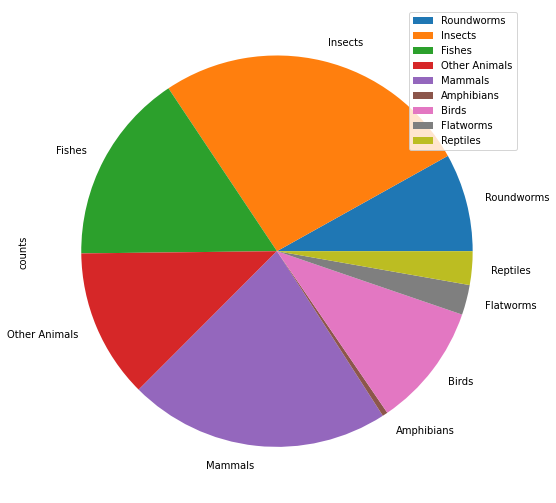

In [ ]:
plot = df.plot.pie(y='counts', figsize=(10, 9))